# Detecção de spam em mensagens de e-mail

## Este trabalho tem como objetivo classificar um e-mail como Spam ou não, utilizando o algoritmo de Machine Learning Naive-Bayes

> O dataset foi extraído do Kaggle, e pode ser conferido neste [link](https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv).







### Bibliotecas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Passo 1) Leitura do Dataset

#### Há 3002 colunas no dataset, sendo elas:
- Uma referente ao nome do e-mail
- Uma referente à predição, se é spam (1) ou não (0)
- As 3000 colunas restantes são as 3000 palabras mais comuns em todos os e-mails, com suas respectivas contagens



In [ ]:
data = pd.read_csv('emails.csv')
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


### Passo 2) Pré-processamento dos dados

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [ ]:
data.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [ ]:
print(data.isna().sum())
print(data.isnull().sum())

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64
Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64


In [ ]:
data = data.drop(columns=['Email No.'])
data.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


### Passo 3) Dividindo os dados em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Prediction'])
y = data['Prediction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

### Passo 4) Instanciando um algoritmo da classe Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

modelo = GaussianNB()

### Passo 5) Treinamento do modelo

In [ ]:
modelo.fit(X_train, y_train)

GaussianNB()

### Passo 6) Realizando a predição 

In [ ]:
y_prev = modelo.predict(X_test)

### Passo 7) Conferindo as métricas de classificação

#### Acurácia

In [ ]:
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(y_test, y_prev)
print(f'Acurácia = {round(acuracia, 2)*100}%')

Acurácia = 96.0%


#### Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_prev))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1116
           1       0.89      0.97      0.93       436

    accuracy                           0.96      1552
   macro avg       0.94      0.96      0.95      1552
weighted avg       0.96      0.96      0.96      1552



#### Matriz de confusão

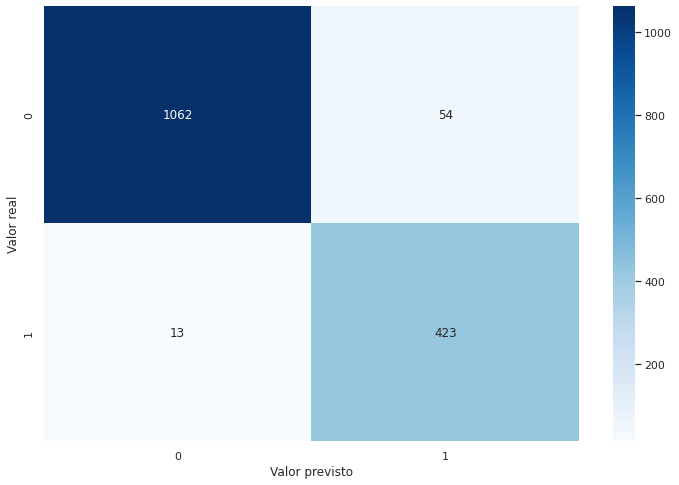

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.crosstab(y_test, y_prev, rownames=['Valor real'], colnames=['Valor previsto'])
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="Blues");